# Importando as bibliotecas e Carregando os dados


In [ ]:
!pip install scikeras[tensorflow]

In [ ]:
import numpy as np # processamento de matrizes
import pandas as pd # biblioteca de manipulação e análise de dados
import matplotlib.pyplot as plt # plotagem de gráficos e visualizações dos dados
import seaborn as sns # plotagem de gráficos e visualizações dos dados
#import plotly.graph_objects as go # plotagem de gráficos e visualizações dos dados
#import plotly.express as px # plotagem de gráficos e visualizações dos dados
from sklearn.datasets import make_blobs
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
    precision_score,
    recall_score )
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from scikeras.wrappers import KerasClassifier, KerasRegressor
from mlxtend.frequent_patterns import apriori, association_rules

sns.set_style("darkgrid") # Definindo o estilo do gráfico para "darkgrid"
pd.set_option("display.max_columns", None)   # Ajustando para que sejam exibidas todas as colunas
pd.options.plotting.backend = "plotly" # Configurando para exibir gráficos interativos


In [ ]:
df = pd.read_csv("tcc.csv") # carregando os dados

df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,0,6,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,0,6,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
3,4,0,1,0,0,1,1,0,0,0,1,5,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
4,5,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


Antes do próximo passo, deverá ser efetuado o upload do arquivo "Dataset", no formato CSV.

# Tratamento dos dados e features

### Excluindo featurs que de antemão sabemos que não são fatores interessantes para o modelo.

In [ ]:
df.columns

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df.drop(['contry_of_res','used_app_before', 'age_desc', 'relation'], axis = 1, inplace = True)


### Traduzindo as features

Como o Dataset coletado não é brasileiro, os dados estão em inglês. Portanto, iremos traduzir os dados e as features.

In [ ]:
df = df.rename(columns={"age": 'idade',
                        "gender":"genero",
                        "austim": "autismo",
                        "Sex":"Genero",
                        "ethnicity":"etnia",
                        "jundice": "ictericia",
                        "result":"resultado_AQ10",
                        "Class/ASD": "Classe_TEA",
                        "A1_Score": "A1",
                        "A2_Score": "A2",
                        "A3_Score": "A3",
                        "A4_Score": "A4",
                        "A5_Score": "A5",
                        "A6_Score": "A6",
                        "A7_Score": "A7",
                        "A8_Score": "A8",
                        "A9_Score": "A9",
                        "A10_Score": "A10",
})


### Transformando os dados "Yes" e "No" em dados binários

In [ ]:
dicionario = {
   'no':0,
   'yes':1}
dicionario2 = {
   'NO':0,
   'YES':1}
dicionario3 = {
   'f':'F',
   'm':'M'}

In [ ]:
df = df.replace({'autism':dicionario})
df = df.replace({'Classe_TEA':dicionario2})
df = df.replace({'ictericia': dicionario})
df = df.replace({'autismo': dicionario})
df = df.replace({'genero': dicionario3})

### Traduzinho os dados das colunas "Etnia" e "Quem_respondeu_o_teste"

In [ ]:
df.etnia.unique() # Listando todas as etnias do dataset

array(['Others', 'Middle Eastern ', '?', 'White-European', 'Black',
       'South Asian', 'Asian', 'Pasifika', 'Hispanic', 'Turkish',
       'Latino'], dtype=object)

In [ ]:
dic_etnia = {
   "'Middle Eastern '":"Oriente_medio",
   'White-European': "Europeu_branco",
   'Hispanic': "Hispanico",
   'Black': 'Negro',
   'Asian': 'Asiatico',
   "'South Asian'": "Sul_asiatico",
   'Others': "Outros",
   '?': "Outros",
   'south asian': "Sul_asiatico",
   'Turkish': "Turco",
   'Pasifika': "Pacifico"}

   # dicionário traduzindo as etnias

In [ ]:
df = df.replace({'etnia':dic_etnia}) #Substituindo os valores originais pelos valores do dicionário

In [ ]:
df.etnia.unique() # Listando todas as etnias do dataset

array(['Outros', 'Middle Eastern ', 'Europeu_branco', 'Negro',
       'South Asian', 'Asiatico', 'Pacifico', 'Hispanico', 'Turco',
       'Latino'], dtype=object)

### Tratando valores nulos

In [ ]:
df.idade.unique() # Listando todas as possíveis respostas


array(['6', '5', '4', '11', '10', '8', '7', '9', '?'], dtype=object)

In [ ]:
df = df.drop(df[df.idade == '?'].index)

In [ ]:
df.idade = df.idade.astype(int)

In [ ]:
df.idade.unique() # Listando todas as possíveis respostas


array([ 6,  5,  4, 11, 10,  8,  7,  9])

Não há dados ausentes.

# Informações sobre o DataSet

In [ ]:
df.head(2)

,id,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,idade,genero,etnia,ictericia,autismo,resultado_AQ10,Classe_TEA
0,1,1,1,0,0,1,1,0,1,0,0,6,M,Outros,0,0,5,0
1,2,1,1,0,0,1,1,0,1,0,0,6,M,Middle Eastern,0,0,5,0


### Meta Dados do Dataframe



In [ ]:
print(f'Shape of dataframe is: {df.shape}') # Tamanho da DataFrame

Shape of dataframe is: (288, 18)


In [ ]:
pd.DataFrame(df.dtypes,
             columns = ["Data Type"]) #Tipo de dados de cada coluna

,Data Type
id,int64
A1,int64
A2,int64
A3,int64
A4,int64
A5,int64
A6,int64
A7,int64
A8,int64
A9,int64


In [ ]:
df.columns

Index(['id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'idade', 'genero', 'etnia', 'ictericia', 'autismo', 'resultado_AQ10',
       'Classe_TEA'],
      dtype='object')

In [ ]:
print(df.A1.unique())
print(df.A2.unique())
print(df.A3.unique())
print(df.A4.unique())
print(df.A5.unique())
print(df.A6.unique())
print(df.A7.unique())
print(df.A8.unique())
print(df.A9.unique())
print(df.A10.unique())
print(df.idade.unique())
print(df.genero.unique())
print(df.etnia.unique())
print(df.ictericia.unique())
print(df.autismo.unique())
print(df.resultado_AQ10.unique())
print(df.Classe_TEA.unique())


[1 0]
[1 0]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[ 6  5  4 11 10  8  7  9]
['M' 'F']
['Outros' 'Middle Eastern ' 'Europeu_branco' 'Negro' 'South Asian'
 'Asiatico' 'Pacifico' 'Hispanico' 'Turco' 'Latino']
[0 1]
[0 1]
[ 5  4 10  7  8  3  9  2  1  6  0]
[0 1]


In [ ]:
tabela = {'Nome do campo': ['A1 à A10', 'Idade', 'Gênero', 'Etnia', 'Icterícia', 'Autismo', 'Resultado_AQ10', 'Classe_TEA' ],
         'Tipo de dado': ['Qualitativo nominal binário', 'Quantitativo discreto', 'Qualitativo nominal binário', 'Qualitativo nominal Multivalorado','Qualitativo nominal binário', 'Qualitativo nominal binário', 'Quantitativo discreto','Qualitativo nominal binário' ],
         'Conteúdo': [df.A1.unique(), df.idade.unique(), df.genero.unique(), df.etnia.unique(), df.ictericia.unique(), df.autismo.unique(),  df.resultado_AQ10.unique(), df.Classe_TEA.unique()]}
tabela = pd.DataFrame(tabela)

In [ ]:
tabela

,Nome do campo,Tipo de dado,Conteúdo
0,A1 à A10,Qualitativo nominal binário,"[1, 0]"
1,Idade,Quantitativo discreto,"[6, 5, 4, 11, 10, 8, 7, 9]"
2,Gênero,Qualitativo nominal binário,"[M, F]"
3,Etnia,Qualitativo nominal Multivalorado,"[Outros, Middle Eastern , Europeu_branco, Negr..."
4,Icterícia,Qualitativo nominal binário,"[0, 1]"
5,Autismo,Qualitativo nominal binário,"[0, 1]"
6,Resultado_AQ10,Quantitativo discreto,"[5, 4, 10, 7, 8, 3, 9, 2, 1, 6, 0]"
7,Classe_TEA,Qualitativo nominal binário,"[0, 1]"


### Descrevendo as feactures

### Entendendo os campos Autismo e Classe_TEA

A hipótese é que o campo "Classe_TEA" é derivado do campo "Resultado_AQ10".

In [ ]:
para_teste = df[['resultado_AQ10', 'Classe_TEA']]

In [ ]:
dic_AQ10 = {0: '0 - 6',
            1: '0 - 6',
            2: '0 - 6',
            3: '0 - 6',
            4: '0 - 6',
            5: '0 - 6',
            6: '0 - 6',
            7: '7 - 10',
            8: '7 - 10',
            9: '7 - 10',
            10: '7 - 10'
          }

In [ ]:
para_teste = para_teste.replace({'resultado_AQ10':dic_AQ10})

In [ ]:
para_teste

,resultado_AQ10,Classe_TEA
0,0 - 6,0
1,0 - 6,0
2,0 - 6,0
3,0 - 6,0
4,7 - 10,1
...,...,...
287,7 - 10,1
288,0 - 6,0
289,7 - 10,1
290,7 - 10,1


In [ ]:
para_teste.groupby(['resultado_AQ10']).sum()

,Classe_TEA
resultado_AQ10,
0 - 6,0
7 - 10,139


Note que, de fato, a hipótese estava correta. Logo, vamos eliminar uma das colunas, no caso a coluna Classe_TEA.

Entretanto, o campo resultado_AQ10 também é resultado das respostas das perguntas A1 à A10. Varificaremos abaixo se há forte correlação entre os campos das perguntas A1 à A10 e o campo Classe_TEA. Se houver, ambas serão eliminadas, pelo motivo de redundância.

In [ ]:
df = df.drop(['Classe_TEA'], axis=1)
df.head(1)

,id,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,idade,genero,etnia,ictericia,autismo,resultado_AQ10
0,1,1,1,0,0,1,1,0,1,0,0,6,M,Outros,0,0,5


# Estatística dos dados

In [ ]:
dicionario_plot = {
    'no': 'Nao',
    'yes': 'Sim'}

dicionario_plot2 = {
    'm': 'Masc',
    'f': 'Fem'}

In [ ]:
df_plot = df.replace({'autismo': dicionario_plot})
df_plot = df.replace({'ictericia': dicionario_plot})
df_plot = df.replace({'genero': dicionario_plot2})

In [ ]:
df_plot.head(2)

,id,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,idade,genero,etnia,ictericia,autismo,resultado_AQ10
0,1,1,1,0,0,1,1,0,1,0,0,6,M,Outros,0,0,5
1,2,1,1,0,0,1,1,0,1,0,0,6,M,Middle Eastern,0,0,5


# Visualização dos Dados



```
# Isto está formatado como código
```

### Analisando a relação do atributo Gênero x Diagnóstico do Autismo

Text(0, 0.5, 'Quantidade')

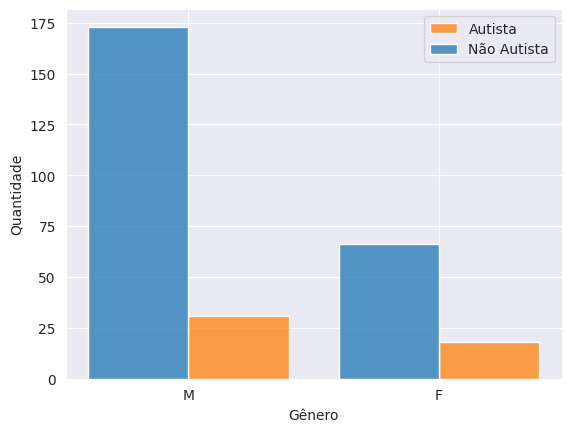

In [ ]:
sns.histplot(data=df, x='genero', hue='autismo', multiple="dodge", shrink=.8)
plt.legend(labels=["Autista","Não Autista"])
plt.xlabel('Gênero')
plt.ylabel('Quantidade')


É possível inferir do gráfico que o número de meninos da nossa base de dados é bem maior do que o número de meninas, e que o número de autistas meninos também é maior que o número de autistas meninas. Entretanto, a taxa de diagnóstico nas meninas da nossa base de dados é maior.

### Analisando a relação do atributo Etnia x Diagnóstico do Autismo

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Outros'),
  Text(1, 0, 'Middle Eastern '),
  Text(2, 0, 'Europeu_branco'),
  Text(3, 0, 'Negro'),
  Text(4, 0, 'South Asian'),
  Text(5, 0, 'Asiatico'),
  Text(6, 0, 'Pacifico'),
  Text(7, 0, 'Hispanico'),
  Text(8, 0, 'Turco'),
  Text(9, 0, 'Latino')])

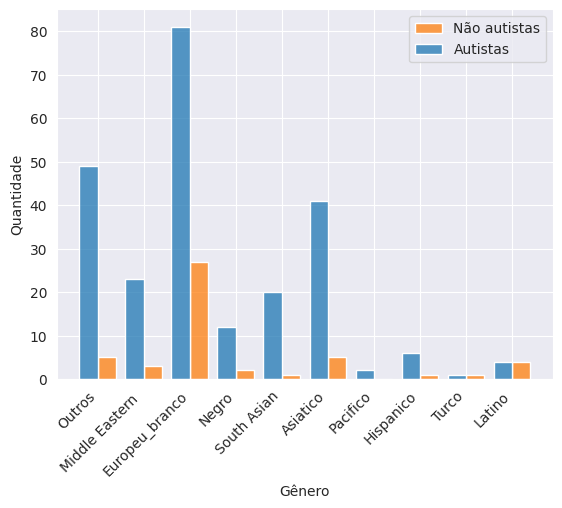

In [ ]:
sns.histplot(data=df, x='etnia', hue='autismo', multiple="dodge", shrink=.8)

plt.legend(labels=["Não autistas","Autistas"])
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha="right")


Pelo gráfico, parece que algumas etnias tendem a apresentar um número maior de resultados positivos que outras. Entretando, como essa base de dados não tem um número representativo de todas as etnias, não consideraremos essa variável para gerar nosso modelo. Entretanto, um trabalho futuro, com uma base de dados mais representativa, pode ser uma feature interessante.

In [ ]:
df = df.drop(columns=['etnia'])

### Analisando a relação do atributo Icterícia x Diagnóstico do Autismo

1.   Item da lista

*   Item da lista
*   Item da lista


2.   Item da lista



([<matplotlib.axis.XTick at 0x7f4b6861b670>,
 [Text(0.0, 0, 'Com Icterícia'),
  Text(0.2, 0, ''),
  Text(0.4, 0, ''),
  Text(0.6, 0, ''),
  Text(0.8, 0, ''),
  Text(1.0, 0, 'Sem Icterícia')])

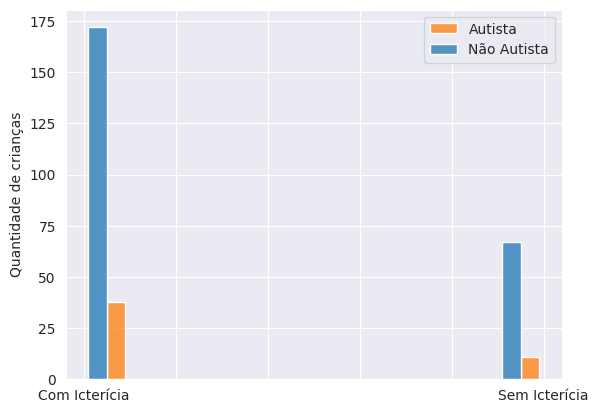

In [ ]:
sns.histplot(data=df, x='ictericia', hue='autismo', multiple="dodge", shrink=.8)
label = ['Sem icterícia', '', '', '','', 'Com icterícia']

plt.legend(labels=["Autista","Não Autista"])
plt.xlabel('')
plt.ylabel('Quantidade de crianças')
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1], ['Com Icterícia', '', '', '', '','Sem Icterícia'])

Visualmente é possível perceber que a taxa de crianças com autismo é bastante semelhante em crianças que nasceram com icterícia e crianças que não nasceram com icterícia. Logo, essa variável não possui correlação direta com o diagnóstico. Neste caso, é um atributo que não gerará grande diferença no resultado final do modelo, por isso vamos deixá-la.

### Analisando a relação do atributo Idade x Diagnóstico do Autismo

Text(0, 0.5, 'Quantidade de crianças')

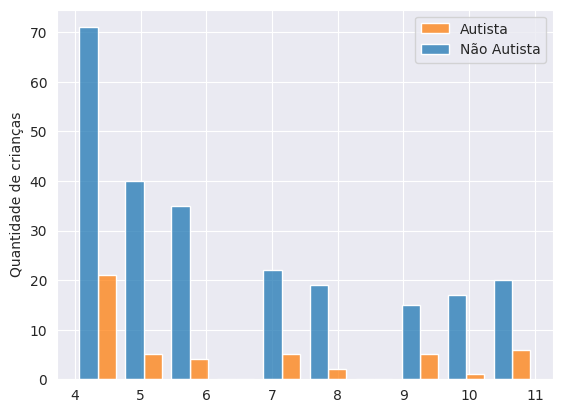

In [ ]:
sns.histplot(data=df, x='idade', hue='autismo', multiple="dodge", shrink=.8)
label = ['Sem icterícia', '', '', '','', 'Com icterícia']

plt.legend(labels=["Autista","Não Autista"])
plt.xlabel('')
plt.ylabel('Quantidade de crianças')


Visualmente é possível perceber que a taxa de crianças autistas é maior em algumas idades, como nas idades 4, 7, 9 e 11 anos. Por enquanto será mantida, pois isso revela sua importância para o modelo.

### Analisando a relação dos atributos A1 à A10 x Diagnóstico do Autismo

In [ ]:
df.columns

Index(['id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'idade', 'genero', 'ictericia', 'autismo', 'resultado_AQ10'],
      dtype='object')

In [ ]:
perguntas= df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6',
       'A7', 'A8', 'A9', 'A10']]
perguntas.head(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,1,1,0,0,1,1,0,1,0,0
1,1,1,0,0,1,1,0,1,0,0


In [ ]:
perguntas_trans = perguntas.T
perguntas_trans.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,127,128,129,130,131,132,133,134,135,136,137,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291
A1,1,1,1,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,0,1,0,1,0,0,1,1,1,1,0,1,1,0,0,1,1,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0,1,1,0,1,1,1,0,1,0,1,1,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,1,0,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,1,0,1,0,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,0,0,0,0,1,0,0,1,1,1,1,0
A2,1,1,1,1,1,0,0,1,1,0,0,1,1,0,1,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,1,1,1,0,1,0,0,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,1,1,1,1,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1,1,0,0,1,0


In [ ]:
perguntas_trans['Soma']=pd.DataFrame(perguntas_trans.sum(axis=1))

In [ ]:
perguntas_trans.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,127,128,129,130,131,132,133,134,135,136,137,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,Soma
A1,1,1,1,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,0,1,0,1,0,0,1,1,1,1,0,1,1,0,0,1,1,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0,1,1,0,1,1,1,0,1,0,1,1,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,1,0,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,1,0,1,0,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,0,0,0,0,1,0,0,1,1,1,1,0,183
A2,1,1,1,1,1,0,0,1,1,0,0,1,1,0,1,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,1,1,1,0,1,0,0,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,1,1,1,1,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1,0,1,1,0,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1,1,0,0,1,0,154


In [ ]:
perguntas_trans.index

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'], dtype='object')

In [ ]:
perguntas_trans = perguntas_trans.sort_values(by='Soma', ascending=False)

Text(0, 0.5, 'Respostas positivas')

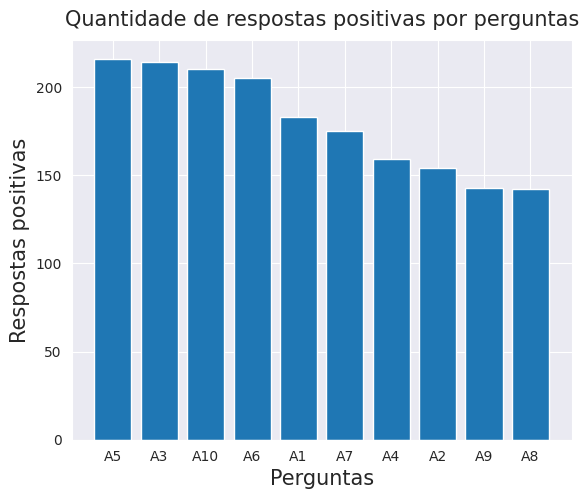

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
x = perguntas_trans.index
y= perguntas_trans.Soma


eixo.bar(x,y)
eixo.set_title('Quantidade de respostas positivas por perguntas', fontsize=15, pad=10)
eixo.set_xlabel('Perguntas', fontsize=15)
eixo.set_ylabel('Respostas positivas', fontsize=15)

In [ ]:
perguntas_tea= df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6',
       'A7', 'A8', 'A9', 'A10', 'autismo']]
perguntas_tea_agrup=perguntas_tea.groupby(by='autismo').sum()
perguntas_tea_agrup_tra = perguntas_tea_agrup.T
perguntas_tea_agrup_tra['% TEA']= perguntas_tea_agrup_tra[1]*100/(perguntas_tea_agrup_tra[0] + perguntas_tea_agrup_tra[1])
perguntas_tea_agrup_tra = perguntas_tea_agrup_tra.sort_values(by='% TEA', ascending=False)
perguntas_tea_agrup_tra

autismo,0,1,% TEA
A5,176,40,18.518519
A4,131,28,17.610063
A7,146,29,16.571429
A1,153,30,16.393443
A10,176,34,16.190476
A9,120,23,16.083916
A3,180,34,15.887850
A6,175,30,14.634146
A2,132,22,14.285714
A8,124,18,12.676056


Text(0, 0.5, 'Taxa de respostas positivas (em %)')

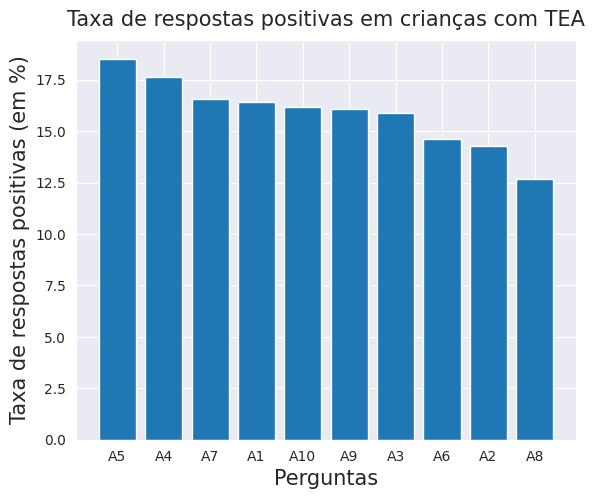

In [ ]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
x = perguntas_tea_agrup_tra.index
y= perguntas_tea_agrup_tra['% TEA']


eixo.bar(x,y)
eixo.set_title('Taxa de respostas positivas em crianças com TEA', fontsize=15, pad=10)
eixo.set_xlabel('Perguntas', fontsize=15)
eixo.set_ylabel('Taxa de respostas positivas (em %)', fontsize=15)

Fazendo um comparativo entre o total de respostas "sim" para as perguntas e o total de respostas "sim" dadas por crianças que possuem TEA, é possível verificar que existem perguntas com um peso maior no diagnóstico que outras. Por exemplo, a pergunta A6, ficou em 4° lugar com no ranking de respostas positivas, mas no ranking de % de respostas positivas em crianças com TEA, ficou em 8°.

### Entendendo a correlação entre os atributos

### Gerando a matriz de correlação

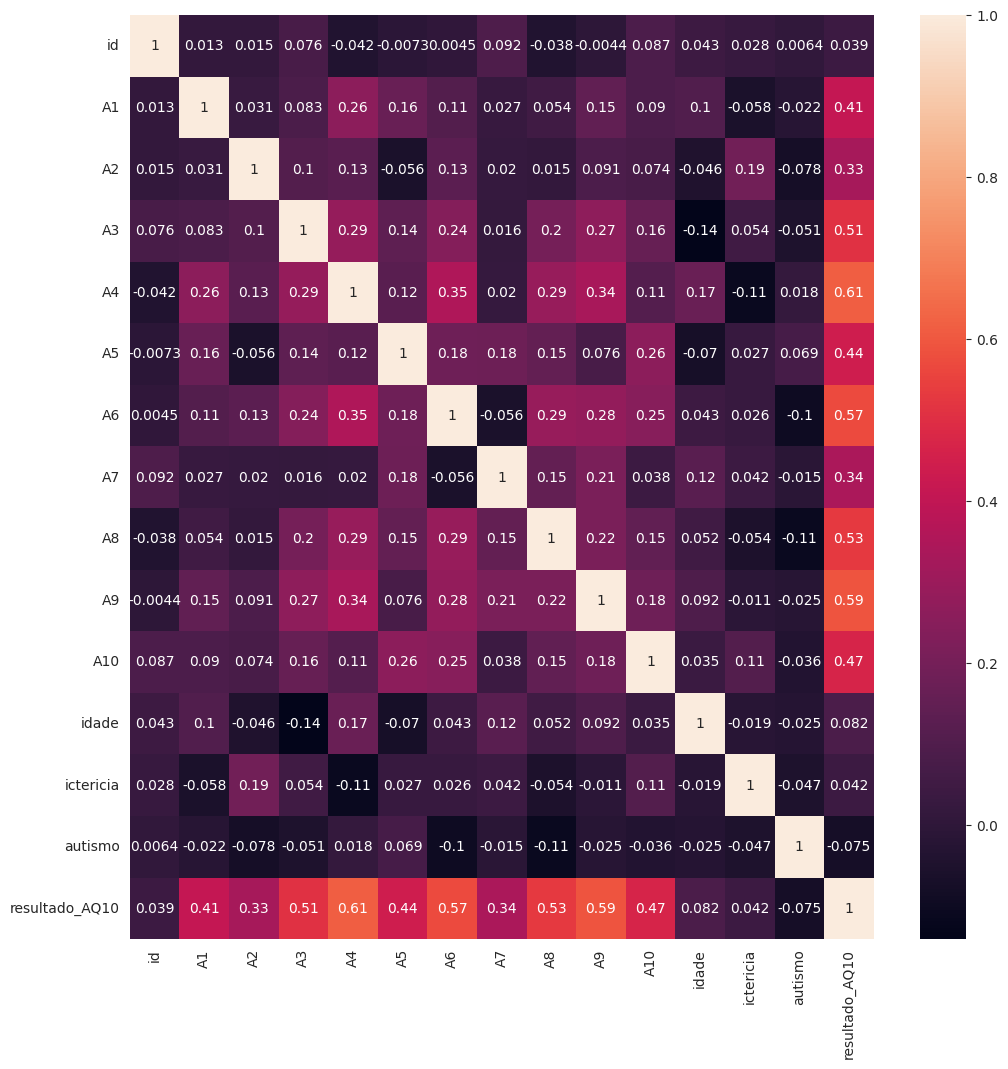

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(df.select_dtypes(['float64','int64']).corr(),annot =True)
plt.show()

Para podermos gerar um modelo sem comprometimento de sua eficácia, é necessário que as variáveis numéricas não possuam forte correlação entre si. Entretanto não faz sentido interpretar a correlação entre variáveis binárias.

Note que o resultado do teste AQ10, que é um dado numérico, possui forte correlação com as questões do teste A1 à A10 e com a Classe_TEA, que são dados binários. Por isso, não consideraremos a informação do resultado_AQ10 para a criação do modelo.

In [ ]:
df = df.drop(['resultado_AQ10'], axis=1)
df.head(1)

,id,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,idade,genero,ictericia,autismo
0,1,1,1,0,0,1,1,0,1,0,0,6,M,0,0


In [ ]:
df.head(1)

,id,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,idade,genero,ictericia,autismo
0,1,1,1,0,0,1,1,0,1,0,0,6,M,0,0


### Interpretando a matriz de correlação

Para podermos gerar um modelo sem comprometimento de sua eficácia, é necessário que as variáveis numéricas não possuam forte correlação entre si. Entretanto não faz sentido interpretar a correlação entre variáveis binárias.

Note que o resultado do teste AQ10, que é um dado numérico, possui forte correlação com as questões do teste A1 à A10 e com a Classe_TEA, que são dados binários. Por isso, não consideraremos a informação do resultado_AQ10 para a criação do modelo.

# Dados de pré-processamento para o modelo de classificação

### Dividindo dados em X e Y

In [ ]:
X = df.drop(["autismo"], axis = 1)    # selecionando todos os outros recursos, exceto "autismo" para treinamento
Y = df['autismo']

In [ ]:
X = pd.get_dummies(X)

### Balanceando os dados

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Random Oversampler
ros = RandomOverSampler(random_state = 32)
X_ros_res, Y_ros_res = ros.fit_resample(X, Y)

#SMOTE
smote = SMOTE(random_state = 32)
X_smote_res, Y_smote_res = smote.fit_resample(X, Y)

#Modelos com SMOTE

##Dividindo os dados em treino e teste

In [ ]:
SEED = 42
np.random.seed(SEED)

X_treino_smote, X_teste_smote, Y_treino_smote, Y_teste_smote = train_test_split(X_smote_res, Y_smote_res, test_size = 0.25, stratify = Y_smote_res, random_state=0) #random state é o que nos garantirá que sempre que rodarmos o código, o resultado será o mesmo.

In [ ]:
print(f"O formato do X_treino é: {X_treino_smote.shape}")
print(f"O formato do Y_treino é: {Y_treino_smote.shape}\n")
print(f"O formato do X_teste é: {X_teste_smote.shape}")
print(f"O formato do Y_teste é: {Y_teste_smote.shape}")

O formato do X_treino é: (358, 15)
O formato do Y_treino é: (358,)

O formato do X_teste é: (120, 15)
O formato do Y_teste é: (120,)


## Testando classificadores

In [ ]:
cv = KFold(n_splits = 5, shuffle = True)

model_dt = DecisionTreeClassifier(max_depth=5, random_state=0)
model_log = LogisticRegression(solver='liblinear')
model_nb = GaussianNB()
model_rand = RandomForestClassifier(n_estimators=100)
model_svm = svm.SVC(kernel='linear')
models = [model_dt, model_nb, model_svm, model_log, model_rand]
name = ['Árvore de Decisão', 'Regressão Logística', 'NaiveBayes', 'SVM', 'Random Forest']
count = 0
for item in models:
    np.random.seed(SEED)
    results_acc = cross_val_score(item, X_treino_smote, Y_treino_smote, cv = cv,
                              scoring = 'accuracy')
    mean = results_acc.mean()
    dv = results_acc.std()
    print('Acurácia média - Modelo {}: {:.2f}%'
          .format(name[count], mean*100))
    print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'
           .format(name[count],
                  (mean - 2*dv)*100, (mean + 2*dv)*100))
    count += 1

Acurácia média - Modelo Árvore de Decisão: 79.06%
Intervalo de acurácia - Modelo Árvore de Decisão: [73.64% ~ 84.48%]

Acurácia média - Modelo Regressão Logística: 74.87%
Intervalo de acurácia - Modelo Regressão Logística: [69.22% ~ 80.52%]

Acurácia média - Modelo NaiveBayes: 76.83%
Intervalo de acurácia - Modelo NaiveBayes: [71.32% ~ 82.34%]

Acurácia média - Modelo SVM: 77.94%
Intervalo de acurácia - Modelo SVM: [74.05% ~ 81.83%]

Acurácia média - Modelo Random Forest: 87.45%
Intervalo de acurácia - Modelo Random Forest: [81.21% ~ 93.68%]



## Medindo a precisão e recall de cada modelo

In [ ]:
count = 0
for item in models:
    np.random.seed(SEED)
    results_precision = cross_val_score(item, X_treino_smote, Y_treino_smote, cv = cv,
                              scoring = 'precision')
    mean = results_precision.mean()
    dv = results_precision.std()
    print('Precisão média - Modelo {}: {:.2f}%'
          .format(name[count], mean*100))
    print('Intervalo de precisão - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'
           .format(name[count],
                  (mean - 2*dv)*100, (mean + 2*dv)*100))
    count += 1

Precisão média - Modelo Árvore de Decisão: 81.14%
Intervalo de precisão - Modelo Árvore de Decisão: [72.66% ~ 89.62%]

Precisão média - Modelo Regressão Logística: 75.53%
Intervalo de precisão - Modelo Regressão Logística: [65.16% ~ 85.89%]

Precisão média - Modelo NaiveBayes: 80.60%
Intervalo de precisão - Modelo NaiveBayes: [65.92% ~ 95.27%]

Precisão média - Modelo SVM: 81.37%
Intervalo de precisão - Modelo SVM: [72.22% ~ 90.52%]

Precisão média - Modelo Random Forest: 86.72%
Intervalo de precisão - Modelo Random Forest: [75.68% ~ 97.75%]



In [ ]:
count = 0
for item in models:
    np.random.seed(SEED)
    results_recall = cross_val_score(item, X_treino_smote, Y_treino_smote, cv = cv,
                              scoring = 'recall')
    mean = results_recall.mean()
    dv = results_recall.std()
    print('Recall média - Modelo {}: {:.2f}%'
          .format(name[count], mean*100))
    print('Recall de precisão - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'
           .format(name[count],
                  (mean - 2*dv)*100, (mean + 2*dv)*100))
    count += 1

Recall média - Modelo Árvore de Decisão: 76.53%
Recall de precisão - Modelo Árvore de Decisão: [62.49% ~ 90.56%]

Recall média - Modelo Regressão Logística: 74.48%
Recall de precisão - Modelo Regressão Logística: [63.80% ~ 85.17%]

Recall média - Modelo NaiveBayes: 71.73%
Recall de precisão - Modelo NaiveBayes: [58.09% ~ 85.38%]

Recall média - Modelo SVM: 72.74%
Recall de precisão - Modelo SVM: [60.41% ~ 85.07%]

Recall média - Modelo Random Forest: 89.04%
Recall de precisão - Modelo Random Forest: [80.79% ~ 97.30%]



## Testando os modelos com Adaboost

In [ ]:
model_dt_ab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                                   n_estimators=50,
                                   learning_rate=1)

model_log_ab = AdaBoostClassifier(LogisticRegression(solver='liblinear'))
model_nb_ab = AdaBoostClassifier(GaussianNB())
model_rand_ab = AdaBoostClassifier(RandomForestClassifier(n_estimators=100))
model_svm_ab = AdaBoostClassifier(svm.SVC(kernel='linear', probability=True))
models_ab = [model_dt_ab,model_nb_ab, model_svm_ab, model_log_ab, model_rand_ab]

name = ['Árvore de Decisão com AdaBoost', 'NaiveBayes com AdaBoost', 'SVM com AdaBoost',
        'Regressão Logística com AdaBoost', 'Random Forest com AdaBoost']

count = 0
for item_ab in models_ab:
    np.random.seed(SEED)
    results_acc_ab = cross_val_score(item_ab, X_treino_smote, Y_treino_smote, cv = cv,
                              scoring = 'accuracy')
    mean = results_acc_ab.mean()
    dv = results_acc_ab.std()
    print('Acurácia média - Modelo {}: {:.2f}%'
          .format(name[count], mean*100))
    print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'
           .format(name[count],
                  (mean - 2*dv)*100, (mean + 2*dv)*100))
    count += 1

Acurácia média - Modelo Árvore de Decisão com AdaBoost: 87.43%
Intervalo de acurácia - Modelo Árvore de Decisão com AdaBoost: [80.34% ~ 94.51%]

Acurácia média - Modelo NaiveBayes com AdaBoost: 61.20%
Intervalo de acurácia - Modelo NaiveBayes com AdaBoost: [53.49% ~ 68.91%]

Acurácia média - Modelo SVM com AdaBoost: 68.93%
Intervalo de acurácia - Modelo SVM com AdaBoost: [49.15% ~ 88.70%]

Acurácia média - Modelo Regressão Logística com AdaBoost: 77.09%
Intervalo de acurácia - Modelo Regressão Logística com AdaBoost: [70.20% ~ 83.97%]

Acurácia média - Modelo Random Forest com AdaBoost: 88.00%
Intervalo de acurácia - Modelo Random Forest com AdaBoost: [81.77% ~ 94.22%]



### Tentando melhorar a acurácia dos dois melhores modelos

In [ ]:
max_depth = [3, 4, 5, 7, 8, 9]

for item in max_depth:
    np.random.seed(SEED)
    cv = KFold(n_splits = 5, shuffle = True)
    model_dt_ab_metrics= AdaBoostClassifier(DecisionTreeClassifier(max_depth=item),
                                   n_estimators=50,
                                   learning_rate=1,)
    results = cross_val_score(model_dt_ab_metrics, X_treino_smote, Y_treino_smote, cv = cv,
                              scoring = 'accuracy')
    mean = results.mean()
    dv = results.std()
    print('Acurácia média - Max Depth {}: {:.2f}%'
          .format(item, mean*100))
    print('Intervalo de acurácia - Max Depth {}: [{:.2f}% ~ {:.2f}%]\n'
          .format(item, (mean - 2*dv)*100, (mean + 2*dv)*100))


Acurácia média - Max Depth 3: 83.27%
Intervalo de acurácia - Max Depth 3: [72.71% ~ 93.83%]

Acurácia média - Max Depth 4: 84.37%
Intervalo de acurácia - Max Depth 4: [77.81% ~ 90.94%]

Acurácia média - Max Depth 5: 87.43%
Intervalo de acurácia - Max Depth 5: [80.34% ~ 94.51%]

Acurácia média - Max Depth 7: 87.72%
Intervalo de acurácia - Max Depth 7: [78.58% ~ 96.87%]

Acurácia média - Max Depth 8: 85.77%
Intervalo de acurácia - Max Depth 8: [79.01% ~ 92.54%]

Acurácia média - Max Depth 9: 86.32%
Intervalo de acurácia - Max Depth 9: [83.16% ~ 89.48%]



In [ ]:
n_estimator= [10, 20, 30, 50, 100, 150, 200]

for item in n_estimator:
    np.random.seed(SEED)
    cv = KFold(n_splits = 5, shuffle = True)
    model_dt_ab_metrics= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                                   n_estimators=item)
    results = cross_val_score(model_dt_ab_metrics, X_treino_smote, Y_treino_smote, cv = cv,
                              scoring = 'accuracy')
    mean = results.mean()
    dv = results.std()
    print('Acurácia média - n_estimator {}: {:.2f}%'
          .format(item, mean*100))
    print('Intervalo de acurácia - n_estimator {}: [{:.2f}% ~ {:.2f}%]\n'
          .format(item, (mean - 2*dv)*100, (mean + 2*dv)*100))


Acurácia média - Max Depth 10: 81.01%
Intervalo de acurácia - Max Depth 10: [74.61% ~ 87.42%]

Acurácia média - Max Depth 20: 83.24%
Intervalo de acurácia - Max Depth 20: [78.59% ~ 87.89%]

Acurácia média - Max Depth 30: 84.08%
Intervalo de acurácia - Max Depth 30: [77.43% ~ 90.74%]

Acurácia média - Max Depth 50: 82.41%
Intervalo de acurácia - Max Depth 50: [76.51% ~ 88.31%]

Acurácia média - Max Depth 100: 82.39%
Intervalo de acurácia - Max Depth 100: [73.21% ~ 91.58%]

Acurácia média - Max Depth 150: 81.55%
Intervalo de acurácia - Max Depth 150: [73.29% ~ 89.82%]

Acurácia média - Max Depth 200: 82.40%
Intervalo de acurácia - Max Depth 200: [73.79% ~ 91.01%]



In [ ]:
learning_rate = [1, 2, 3, 4, 5]

for item in learning_rate:
    np.random.seed(SEED)
    cv = KFold(n_splits = 5, shuffle = True)
    model_dt_ab_metrics= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                                   learning_rate= item)
    results = cross_val_score(model_dt_ab_metrics, X_treino_smote, Y_treino_smote, cv = cv,
                              scoring = 'accuracy')
    mean = results.mean()
    dv = results.std()
    print('Acurácia média - learning_rate {}: {:.2f}%'
          .format(item, mean*100))
    print('Intervalo de acurácia - learning_rate {}: [{:.2f}% ~ {:.2f}%]\n'
          .format(item, (mean - 2*dv)*100, (mean + 2*dv)*100))

Acurácia média - Max Depth 1: 83.27%
Intervalo de acurácia - Max Depth 1: [72.71% ~ 93.83%]

Acurácia média - Max Depth 2: 74.56%
Intervalo de acurácia - Max Depth 2: [59.77% ~ 89.34%]

Acurácia média - Max Depth 3: 75.15%
Intervalo de acurácia - Max Depth 3: [64.90% ~ 85.41%]

Acurácia média - Max Depth 4: 72.65%
Intervalo de acurácia - Max Depth 4: [55.23% ~ 90.06%]

Acurácia média - Max Depth 5: 69.28%
Intervalo de acurácia - Max Depth 5: [53.39% ~ 85.17%]



In [ ]:
n_estimator= [3,5,7,9,11]

for item in n_estimator:
    np.random.seed(SEED)
    cv = KFold(n_splits = 5, shuffle = True)
    model_rand_ab = AdaBoostClassifier(RandomForestClassifier(max_depth=item,
                                                              n_estimators=item))

    results = cross_val_score(model_rand_ab, X_treino_smote, Y_treino_smote, cv = cv,
                              scoring = 'accuracy')
    mean = results.mean()
    dv = results.std()
    print('Acurácia média - Max Depth {}: {:.2f}%'
          .format(item, mean*100))
    print('Intervalo de acurácia - Max Depth {}: [{:.2f}% ~ {:.2f}%]\n'
          .format(item, (mean - 2*dv)*100, (mean + 2*dv)*100))

Acurácia média - Max Depth 3: 86.89%
Intervalo de acurácia - Max Depth 3: [75.70% ~ 98.07%]

Acurácia média - Max Depth 5: 86.87%
Intervalo de acurácia - Max Depth 5: [80.34% ~ 93.39%]

Acurácia média - Max Depth 7: 86.87%
Intervalo de acurácia - Max Depth 7: [82.05% ~ 91.70%]

Acurácia média - Max Depth 9: 85.75%
Intervalo de acurácia - Max Depth 9: [80.32% ~ 91.18%]

Acurácia média - Max Depth 11: 84.08%
Intervalo de acurácia - Max Depth 11: [80.29% ~ 87.87%]



In [ ]:
n_estimator= [10, 20, 30, 50, 100, 150, 200]

for item in n_estimator:
    np.random.seed(SEED)
    cv = KFold(n_splits = 5, shuffle = True)
    model_rand_ab = AdaBoostClassifier(RandomForestClassifier(max_depth=3,
                                                              n_estimators=item))

    results = cross_val_score(model_rand_ab, X_treino_smote, Y_treino_smote, cv = cv,
                              scoring = 'accuracy')
    mean = results.mean()
    dv = results.std()
    print('Acurácia média - Max Depth {}: {:.2f}%'
          .format(item, mean*100))
    print('Intervalo de acurácia - Max Depth {}: [{:.2f}% ~ {:.2f}%]\n'
          .format(item, (mean - 2*dv)*100, (mean + 2*dv)*100))

Acurácia média - Max Depth 10: 84.93%
Intervalo de acurácia - Max Depth 10: [76.10% ~ 93.75%]

Acurácia média - Max Depth 20: 84.93%
Intervalo de acurácia - Max Depth 20: [74.40% ~ 95.46%]

Acurácia média - Max Depth 30: 84.38%
Intervalo de acurácia - Max Depth 30: [74.02% ~ 94.75%]

Acurácia média - Max Depth 50: 84.65%
Intervalo de acurácia - Max Depth 50: [76.13% ~ 93.17%]

Acurácia média - Max Depth 100: 84.66%
Intervalo de acurácia - Max Depth 100: [75.12% ~ 94.19%]



### Gerando a matriz de confusão dos dois modelos com melhor acurácia

In [ ]:
model_dt_ab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                                   n_estimators=50,
                                   learning_rate= 1)

In [ ]:
  model_rand_ab = AdaBoostClassifier(RandomForestClassifier(n_estimators=20))

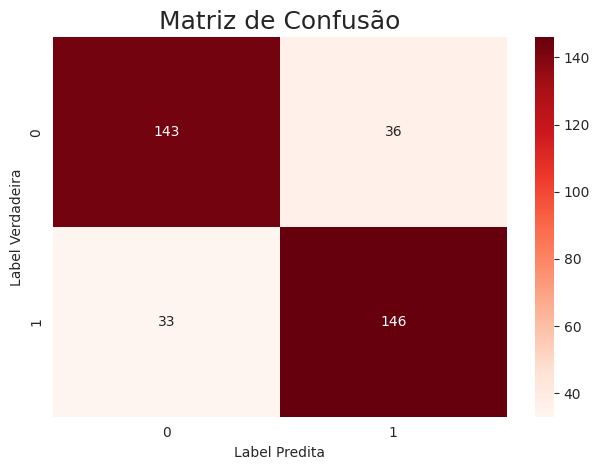

In [ ]:
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
Y_pred = cross_val_predict(model_dt_ab, X_treino_smote, Y_treino_smote, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_treino_smote, Y_pred), annot=True,
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Label Verdadeira")
ax.set_xlabel("Label Predita")
plt.tight_layout()

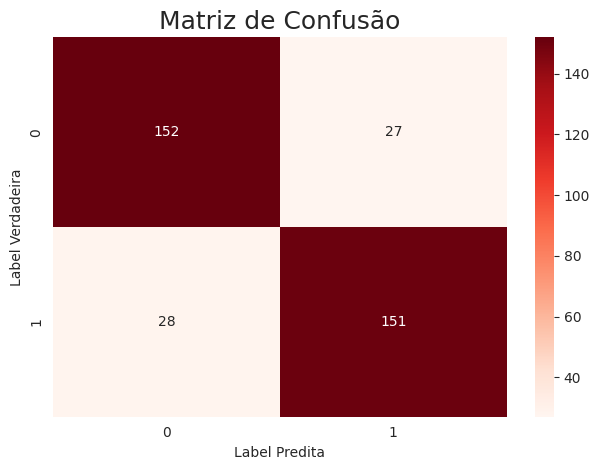

In [ ]:
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
Y_pred = cross_val_predict(model_rand_ab, X_treino_smote, Y_treino_smote, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_treino_smote, Y_pred), annot=True,
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Label Verdadeira")
ax.set_xlabel("Label Predita")
plt.tight_layout()

## Relatório de classficação

In [ ]:
print(classification_report(Y_treino_smote, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       179
           1       0.85      0.84      0.85       179

    accuracy                           0.85       358
   macro avg       0.85      0.85      0.85       358
weighted avg       0.85      0.85      0.85       358



#Modelos com Oversampling

In [ ]:
X_ros_res, Y_ros_res = ros.fit_resample(X, Y)

In [ ]:
X_treino_over, X_teste_over, Y_treino_over, Y_teste_over = train_test_split(X_ros_res, Y_ros_res, test_size = 0.25, stratify = Y_ros_res, random_state=0) #random state é o que nos garantirá que sempre que rodarmos o código, o resultado será o mesmo.

In [ ]:
model_dt_ab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                   n_estimators=50,
                                   learning_rate=1)

model_log_ab = AdaBoostClassifier(LogisticRegression(solver='liblinear'))
model_nb_ab = AdaBoostClassifier(GaussianNB())
model_rand_ab = AdaBoostClassifier(RandomForestClassifier(n_estimators=100))
model_svm_ab = AdaBoostClassifier(svm.SVC(kernel='linear', probability=True))
models_ab = [model_dt_ab,model_nb_ab, model_svm_ab, model_log_ab, model_rand_ab]

name = ['Árvore de Decisão com AdaBoost', 'NaiveBayes com AdaBoost', 'SVM com AdaBoost',
        'Regressão Logística com AdaBoost', 'Random Forest com AdaBoost']

count = 0
for item_ab in models_ab:
    np.random.seed(SEED)
    results = cross_val_score(item_ab, X_treino_over, Y_treino_over, cv = cv,
                              scoring = 'accuracy')
    mean = results.mean()
    dv = results.std()
    print('Acurácia média - Modelo {}: {:.2f}%'
          .format(name[count], mean*100))
    print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'
           .format(name[count],
                  (mean - 2*dv)*100, (mean + 2*dv)*100))
    count += 1

Acurácia média - Modelo Árvore de Decisão com AdaBoost: 73.20%
Intervalo de acurácia - Modelo Árvore de Decisão com AdaBoost: [63.64% ~ 82.76%]

Acurácia média - Modelo NaiveBayes com AdaBoost: 53.08%
Intervalo de acurácia - Modelo NaiveBayes com AdaBoost: [45.77% ~ 60.38%]

Acurácia média - Modelo SVM com AdaBoost: 46.91%
Intervalo de acurácia - Modelo SVM com AdaBoost: [30.92% ~ 62.91%]

Acurácia média - Modelo Regressão Logística com AdaBoost: 58.39%
Intervalo de acurácia - Modelo Regressão Logística com AdaBoost: [52.52% ~ 64.27%]

Acurácia média - Modelo Random Forest com AdaBoost: 88.56%
Intervalo de acurácia - Modelo Random Forest com AdaBoost: [82.72% ~ 94.41%]



## Gerando a matriz de confusão do modelo com melhor acurácia

In [ ]:
cv = KFold(n_splits = 5, shuffle = True)
results_rand_ab = cross_val_predict(model_rand_ab, X_treino_over, Y_treino_over, cv = cv)

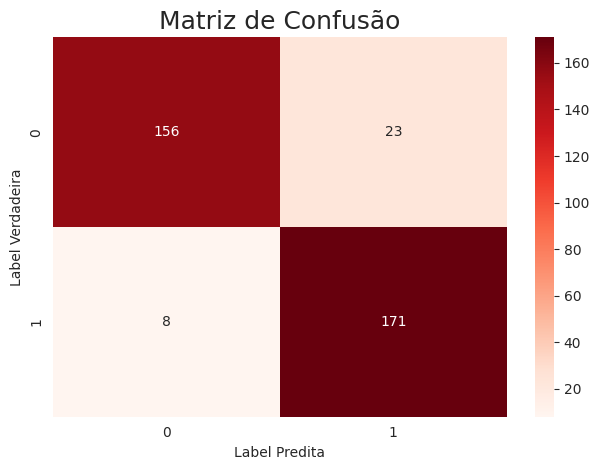

In [ ]:
ig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_treino_over.values, results_rand_ab), annot=True,
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Label Verdadeira")
ax.set_xlabel("Label Predita")
plt.tight_layout()

In [ ]:
print(classification_report(Y_treino_over, results_rand_ab))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       179
           1       0.88      0.96      0.92       179

    accuracy                           0.91       358
   macro avg       0.92      0.91      0.91       358
weighted avg       0.92      0.91      0.91       358



# Com SMOTEEN

In [ ]:
from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN()
X_smoteenn, Y_smoteenn = smoteenn.fit_resample(X, Y)

In [ ]:
X_treino_smoteenn, X_teste_smoteenn, Y_treino_smoteenn, Y_teste_smoteenn = train_test_split(X_smoteenn, Y_smoteenn, test_size = 0.25, stratify = Y_smoteenn, random_state=0) #random state é o que nos garantirá que sempre que rodarmos o código, o resultado será o mesmo.

In [ ]:
model_dt_ab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                   n_estimators=50,
                                   learning_rate=1)

model_log_ab = AdaBoostClassifier(LogisticRegression(solver='liblinear'))
model_nb_ab = AdaBoostClassifier(GaussianNB())
model_rand_ab = AdaBoostClassifier(RandomForestClassifier(n_estimators=100))
model_svm_ab = AdaBoostClassifier(svm.SVC(kernel='linear', probability=True))
models_ab = [model_dt_ab,model_nb_ab, model_svm_ab, model_log_ab, model_rand_ab]

name = ['Árvore de Decisão com AdaBoost', 'NaiveBayes com AdaBoost', 'SVM com AdaBoost',
        'Regressão Logística com AdaBoost', 'Random Forest com AdaBoost']

count = 0
for item_ab in models_ab:
    np.random.seed(SEED)
    results = cross_val_score(item_ab, X_treino_smoteenn, Y_treino_smoteenn, cv = cv,
                              scoring = 'accuracy')
    mean = results.mean()
    dv = results.std()
    print('Acurácia média - Modelo {}: {:.2f}%'
          .format(name[count], mean*100))
    print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'
           .format(name[count],
                  (mean - 2*dv)*100, (mean + 2*dv)*100))
    count += 1

Acurácia média - Modelo Árvore de Decisão com AdaBoost: 94.81%
Intervalo de acurácia - Modelo Árvore de Decisão com AdaBoost: [88.89% ~ 100.74%]

Acurácia média - Modelo NaiveBayes com AdaBoost: 51.11%
Intervalo de acurácia - Modelo NaiveBayes com AdaBoost: [29.44% ~ 72.78%]

Acurácia média - Modelo SVM com AdaBoost: 65.93%
Intervalo de acurácia - Modelo SVM com AdaBoost: [53.18% ~ 78.67%]

Acurácia média - Modelo Regressão Logística com AdaBoost: 86.67%
Intervalo de acurácia - Modelo Regressão Logística com AdaBoost: [79.11% ~ 94.22%]

Acurácia média - Modelo Random Forest com AdaBoost: 90.37%
Intervalo de acurácia - Modelo Random Forest com AdaBoost: [86.74% ~ 94.00%]



In [ ]:
cv = KFold(n_splits = 5, shuffle = True)
results_rand_ab_smoteen = cross_val_predict(model_rand_ab, X_treino_smoteenn, Y_treino_smoteenn, cv = cv)

In [ ]:
print(classification_report(Y_treino_smoteenn.values, results_rand_ab_smoteen.round()))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82        46
           1       0.89      0.96      0.92        89

    accuracy                           0.89       135
   macro avg       0.89      0.86      0.87       135
weighted avg       0.89      0.89      0.89       135



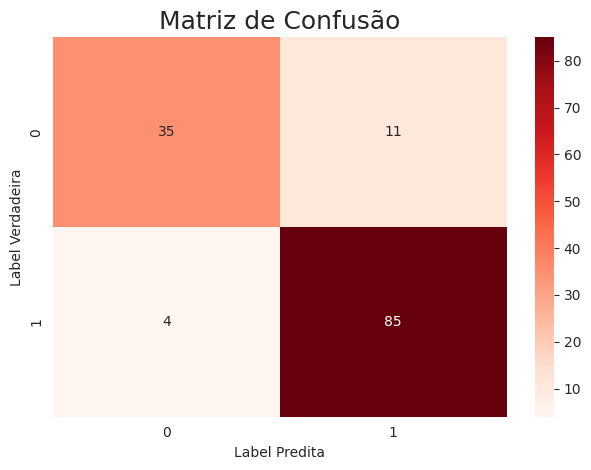

In [ ]:
ig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_treino_smoteenn.values, results_rand_ab_smoteen), annot=True,
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Label Verdadeira")
ax.set_xlabel("Label Predita")
plt.tight_layout()

In [ ]:
entrada_dim = X.shape[1]

In [ ]:
#SMOTE
smote = SMOTE(random_state = 32)
X_smote_res, Y_smote_res = smote.fit_resample(X, Y)

In [ ]:
y_smote_res = pd.get_dummies(Y_smote_res)
#Tranformando dados numéricos em categóricos

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_smote_res, y_smote_res, test_size = 0.25, stratify = y_smote_res, random_state=0) #random state é o que nos garantirá que sempre que rodarmos o código, o resultado será o mesmo.

In [ ]:
def create_model():
    # Cria o modelo
    modelo = Sequential()
    modelo.add(Dense(8, input_dim = entrada_dim, kernel_initializer='normal', activation='relu'))
    modelo.add(Dense(5, activation = "relu", kernel_initializer='normal'))
    modelo.add(Dense(2, activation = 'sigmoid'))

    # Compila o modelo
    modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return modelo


In [ ]:
# # Garante a reproducividade do código
seed = 0
np.random.seed(seed)

In [ ]:
modelo = KerasClassifier(build_fn=create_model, epochs=120, batch_size=5, verbose=0)


In [ ]:
# Valida o modelo com Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(modelo, X, y, cv=kfold)
#print(results.mean())

ValueError: ignored

## Relatório de classificação

In [ ]:
np.random.seed(SEED)
cv = KFold(n_splits = 5, shuffle = True)
y_pred = cross_val_predict(modelo, X_treino, y_treino, cv = cv)


In [ ]:
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
intervalo(y_pred)

In [ ]:
accuracy_score(Y_teste, y_pred)

In [ ]:
print(classification_report(y_treino, y_pred))

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_treino.values.argmax(axis=1), y_pred.argmax(axis=1)), annot=True,
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("Label Verdadeira")
ax.set_xlabel("Label Predita")
plt.tight_layout()